<a href="https://colab.research.google.com/github/Hassan-zeidan/Statistics-for-Data-Science/blob/main/Life_expectancy_(Function).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def PlotMeanMedian(data):
    # Compute mean and median
    mean_value = np.mean(data)
    median_value = np.median(data)

    print(f"Mean = {mean_value:.2f}")
    print(f"Median = {median_value:.2f}")

    # Create figure
    plt.figure(figsize=(4, 8))
    sns.swarmplot(y=data, size=6, color='blue')
    plt.hlines(mean_value, xmin=-0.2, xmax=0.2, colors='red', linestyles='--', linewidth=2,label=f"Mean: {mean_value:.2f}")
    plt.hlines(median_value, xmin=-0.2, xmax=0.2, colors='green', linestyles='-', linewidth=2,label=f"Median: {median_value:.2f}")

    plt.xticks([])
    plt.ylabel("Life Expectancy")
    plt.ylim(min(data) - 5, max(data) + 10)
    plt.legend(loc="upper right")
    plt.show()

Mean = 71.62
Median = 73.90


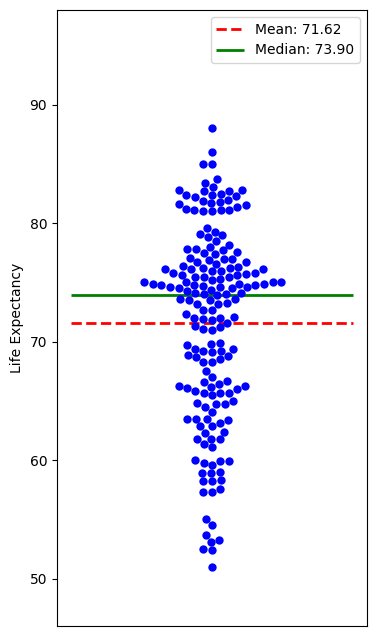

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df_2015 = df[df['Year'] == 2015].dropna(subset=['Life expectancy '])

# Select the life expectancy column
life_exp = df_2015['Life expectancy ']

PlotMeanMedian(life_exp)

In [8]:
def MyVariability(data):
    # Sort data
    data_sorted = sorted(data)

    # Compute quartiles
    Q1 = np.percentile(data_sorted, 25, method="midpoint")
    Q2 = np.median(data_sorted)
    Q3 = np.percentile(data_sorted, 75, method="midpoint")
    IQR = Q3 - Q1

    # Standard deviation
    std_value = np.std(data_sorted, ddof=1)  # sample SD

    # Create figure
    plt.figure(figsize=(5, 8))

    # Swarmplot
    sns.swarmplot(y=data_sorted, color='blue', size=8, marker='o', edgecolor='black', linewidth=1, zorder=1)

    # Plot Q1, Q2, Q3
    plt.plot([0, 0.1], [Q1, Q1], color='red', linestyle='dashed', linewidth=1.5, zorder=3)
    plt.plot([0, 0.1], [Q3, Q3], color='red', linestyle='dashed', linewidth=1.5, zorder=3)
    plt.plot([0, 0.2], [Q2, Q2], color='red', linewidth=3, zorder=3)

    # Annotate quartiles
    plt.text(0.25, Q1, f"Q1={Q1:.1f}", fontsize=12, color='red', zorder=7)
    plt.text(0.25, Q2, f"Q2={Q2:.1f}", fontsize=12, color='red', zorder=7)
    plt.text(0.25, Q3, f"Q3={Q3:.1f}", fontsize=12, color='red', zorder=7)

    # Draw IQR bracket
    plt.plot([0.5, 0.5], [Q1, Q3], color='orange', linewidth=3, zorder=4)
    plt.plot([0.47, 0.53], [Q1, Q1], color='orange', linewidth=3, zorder=4)
    plt.plot([0.47, 0.53], [Q3, Q3], color='orange', linewidth=3, zorder=4)
    plt.text(0.4, (Q1 + Q3) / 2, f"IQR = {IQR:.1f}", fontsize=12, color='blue', zorder=7)

    # Formatting
    plt.xticks([])
    plt.ylabel("Observed Values")
    plt.ylim(min(data_sorted) - 2, max(data_sorted) + 2)
    plt.title("")
    plt.show()

    # Print results
    print(f"IQR = {round(IQR,2)}")
    print(f"Standard Deviation = {round(std_value,2)}")

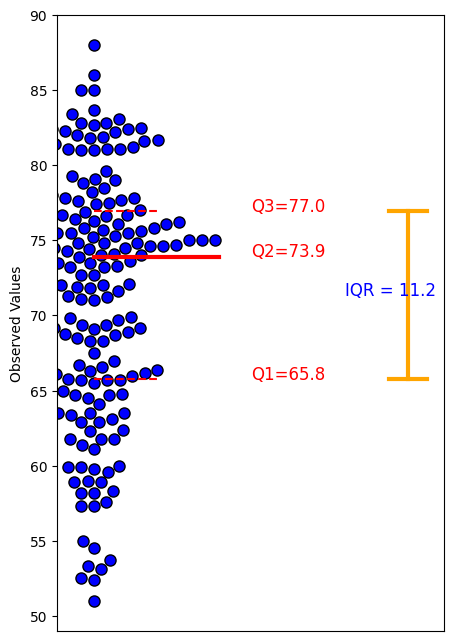

IQR = 11.2
Standard Deviation = 8.12


In [9]:
df = pd.read_csv("Life Expectancy Data.csv")
life_exp = df_2015['Life expectancy ']
MyVariability(life_exp)

# Interpretation:

The mean life expectancy is 71.62 years and the median is 73.90 years. Since the mean is a bit lower, it means there are some countries with very low life expectancy pulling the average down. The data is slightly left skewed.

The range is 37 years (from 51 up to 88). This shows a big gap between the country with the shortest life span and the one with the longest.

The IQR is 11.2 years (Q1 = 65.75, Q3 = 76.95). This tells us that half of the countries are packed within that middle band.

The standard deviation is 8.12 years, which is close to the IQR but a bit smaller, meaning most values are fairly close to the center, but there are still a few countries far away from the average. These can be seen as potential outliers at the low end (below around 55 years)